# Mood-Based Song Clustering Using Spotify Dataset


## Table of Contents

1. [Introduction](#introduction)
2. [Objective](#objective)
3. [Dataset Overview](#dataset-overview)
4. [Exploratory Data Analysis (EDA) Process](#exploratory-data-analysis-eda-process)
5. [K-Means Clustering](#k-means-clustering)
6. [Cluster Evaluation](#cluster-evaluation)
7. [Assigning Mood Classifications to Songs Based on Clustering](#assigning-mood-classifications-to-songs-based-on-clustering)
8. [Saving the PCA and KMeans Models](#saving-the-pca-and-kmeans-models)
9. [Creating a Pipeline](#creating-a-pipeline)
10. [Conclusion](#conclusion)


## Goal
The goal of this project is to develop a machine learning model that clusters music tracks based on their mood using key audio features. This enables personalized music recommendations and playlists for users, enhancing their listening experience.
- ****Personalized Playlists****: Tailors music suggestions based on user emotions, improving engagement.
- ****Content Curation****: Helps platforms organize and discover music faster.
Music Therapy: Supports wellness applications by offering mood-based playlists.
- ****Targeted Marketing****: Enables mood-driven advertising for better audience targeting.
- ****Creative Insights****: Provides artists and labels with valuable audience mood trends.


## Introduction
Music is deeply connected to human emotions, often influencing and reflecting our moods. With access to rich metadata from streaming platforms like Spotify, we can analyze songs based on their musical features to discover patterns and group them by mood. This project uses unsupervised learning to cluster songs based on their attributes, providing insight into how various musical qualities like `energy`, `danceability`, and `valence` relate to different moods.

## Objective

The goal of this project is to use unsupervised clustering, specifically `KNN`, to group songs from the Spotify dataset based on their musical features. The main objectives are:

1. **Perform Exploratory Data Analysis (EDA)** on the dataset to understand the distribution and relationships between various features, such as danceability, energy, and valence.
2. **Preprocess the dataset** by handling missing values, standardizing features, and addressing skewness where necessary.
3. **Apply clustering algorithms** like `KNN` to group songs into distinct clusters based on musical attributes.
4. **Analyze and interpret the resulting clusters** by examining the feature distribution within each cluster and associating them with potential musical moods (e.g., happy, sad, energetic, calm).
5.**Evaluate the clustering results** and refine the model by adjusting hyperparameters and handling class imbalances, if necessary.
6. **Draw insights and conclusions** from the clusters to provide a better understanding of how various musical features contribute to the mood or emotional content of a song.

## Dataset Overview

**Source:**
The dataset is sourced from Hugging Face's open datasets platform and can be accessed [here](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).
Or, Access from my [Google Drive](https://drive.google.com/file/d/10JsSQ74dAH-J9J2Yuq9-ZksYTgYRD1dl/view).


The dataset contains the following key attributes for each song:

- **track_id**: Spotify's unique identifier for the track.
- **artists**: Names of the performing artists.
- **album_name**: The album in which the track appears.
- **track_name**: The title of the track.
- **popularity**: A score from 0 to 100, with higher values indicating more popular songs.
-**duration_ms**: Track length in milliseconds.
- **explicit**: Whether the track contains explicit content.
- **danceability**: A measure of how suitable a track is for dancing, from 0.0 to 1.0.
- **energy**: A measure of intensity and activity (0.0 to 1.0).
- **key**: The musical key the track is in.
- **loudness**: The overall loudness in decibels (dB).
- **mode**: Whether the track is in a major (1) or minor (0) key.
- **speechiness**: The degree to which the track contains spoken words (0.0 to 1.0).
- **acousticness**: A measure of the likelihood that the track is acoustic (0.0 to 1.0).
- **instrumentalness**: Indicates whether the track is primarily instrumental (0.0 to 1.0).
- **liveness**: Detects the presence of a live audience in the recording.
- **valence**: Reflects the emotional positivity conveyed by the track (0.0 to 1.0).
- **tempo**: The tempo in beats per minute (BPM).
- **time_signature**: The musical time signature (e.g., 4/4).
- **track_genre**: The genre classification of the track.

## Exploratory Data Analysis (EDA) Process

---



***1. Loading the Data***
- Import necessary libraries and load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/spotify_tracks_dataset-new.csv')

***2. Understanding the Dataset***
- Check the shape and display the first few rows to get an overview.

In [2]:
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (114000, 21)


Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

#### Shape of the dataset: `(114,000, 21)`
This tells us that your dataset has:

- `114,000 rows`: These represent individual tracks, each associated with various features.
- `21 columns`: These include both track metadata and features related to audio characteristics, which will be used for clustering.

In [3]:
print("Data Types:\n")
df.dtypes

Data Types:



Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

***3. Summary Statistics***
- Generate descriptive statistics for numerical features to understand distributions.

In [4]:
print("Descriptive Statistics:\n")
df.describe()

Descriptive Statistics:



Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

#### Importance of Summary Statistics
- **Understanding Distributions**: Generating descriptive statistics provides insights into the distribution of numerical features within the dataset. This information is essential for grasping the underlying characteristics of the data, including aspects such as `skewness`, `kurtosis`, and the presence of `outliers`.

- **Data Quality Assessment**: The count of non-null values serves as a measure of data quality, aiding in the evaluation of missing data and guiding decisions related to data cleaning and preprocessing.

- **Informed Decision-Making**: Descriptive statistics support further analyses and modeling choices. They help determine appropriate transformations, identify relevant features, and select suitable algorithms based on the data distribution, ultimately contributing to more effective data analysis outcomes.

#### Breakdown of important columns for clustering:
- `Danceability`: The mean is about `0.57` with a relatively small standard deviation, indicating most tracks have moderate danceability.
- `Energy`: The mean is `0.64`, suggesting most tracks are moderately energetic.
- `Loudness`: The mean is `-8.26` decibels, and values range from `-49.53 to 4.53`. Negative loudness values indicate quieter tracks.
- `Valence`: The mean is `0.47`, which shows that most tracks have a moderate emotional positivity.
- `Tempo`: The average tempo is `122 BPM`, with a range from `0 to 243 BPM`, covering both slow and fast tracks.
- `Acousticness`: The mean is `0.31`, indicating that most tracks have some level of acoustic instrumentation but aren't highly acoustic.
- `Instrumentalness`: The mean is quite low at `0.16`, suggesting most tracks are more vocal-centric than instrumental.
- `Liveness`: The mean of `0.21` suggests most tracks aren't live performances but do have some live elements.

#### Observations:
Some columns, like mode `(0 or 1)`, have a binary nature.
Columns like danceability, energy, valence, etc., have a normalized range `(0-1)`, which is well-suited for clustering models.
`Duration (duration_ms)` has a large range `(from 0 to over 5 million milliseconds)`, which might need normalization for better clustering performance.
Some columns, like Unnamed: 0, might not be relevant for clustering and could be removed later.

***4. Feature Selection***

During the initial stages of my exploratory data analysis (EDA), I conducted feature selection to focus on the most relevant features for clustering. This was done to eliminate columns that contained a significant amount of duplicated values, which could negatively impact the clustering process.

#### 1. Danceability
- **Reason**: This feature indicates how suitable a track is for dancing. It often correlates with upbeat, happy moods.
  
#### 2. Energy
- **Reason**: Energy measures the intensity and activity of a track. High-energy tracks are typically associated with excitement or happiness, while low-energy tracks might relate to relaxation or sadness.
  
#### 3. Loudness
- **Reason**: Overall loudness can affect mood perception. Louder tracks might evoke stronger emotional responses, while softer tracks might be more calming.
  
#### 4. Mode
- **Reason**: The mode (major or minor) of a track significantly influences its mood. Major keys are often associated with happier, more uplifting music, while minor keys can convey sadness or melancholy.
  
#### 5. Valence
- **Reason**: Valence measures the musical positiveness or happiness of a track. High valence scores indicate more positive moods, while lower scores might indicate negative or neutral moods.
  
#### 6. Tempo
- **Reason**: The tempo (beats per minute) of a track can influence its mood. Faster tempos are typically associated with excitement, while slower tempos may evoke calmness or introspection.
  
#### 7. Acousticness
- **Reason**: Acousticness indicates how acoustic a track is. More acoustic tracks can convey intimacy or calmness, while electronic tracks may evoke different moods.
  
#### 8. Instrumentalness
- **Reason**: Instrumentalness measures the likelihood that a track is instrumental. Instrumental tracks may evoke specific moods depending on the arrangement and instrumentation used.
  
#### 9. Liveness
- **Reason**: This feature measures the presence of an audience in the recording. Live recordings can evoke feelings of excitement or nostalgia, affecting mood clustering.

In [5]:
mood_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness']
df_mood = df[mood_features]

***4. Checking for Missing Values***
- Identify columns with missing values and their counts.

In [6]:
df_mood.isnull().sum()

danceability        0
energy              0
loudness            0
valence             0
tempo               0
acousticness        0
instrumentalness    0
liveness            0
dtype: int64

- Since there are no missing values in any of the selected mood features, you can proceed confidently to the next steps of your analysis without needing to handle any missing data.
- This is a good indication of the integrity of your dataset, making it suitable for clustering without additional preprocessing related to missing values.

***5. Handle Duplicates***
- Identify duplicates

In [7]:
df_mood.duplicated().sum()

30540

The output shows that there are `30,540` duplicate rows in the `df_mood` DataFrame.

In [8]:
df_mood = df_mood.drop_duplicates(keep='first')
df = df.loc[df_mood.index]

print(f'Number of duplicates removed from df_mood: {df_mood.shape[0] - df.shape[0]}')
print(f'Shape of df_mood_cleaned: {df_mood.shape}')
print(f'Shape of df: {df.shape}')

Number of duplicates removed from df_mood: 0
Shape of df_mood_cleaned: (83460, 8)
Shape of df: (83460, 21)


The output `"No Duplicates: 0"` confirms that there are no duplicate rows left in the `df_mood` DataFrame.

***6. Correlation Analysis***
- Generate a correlation matrix to identify relationships between numerical features.

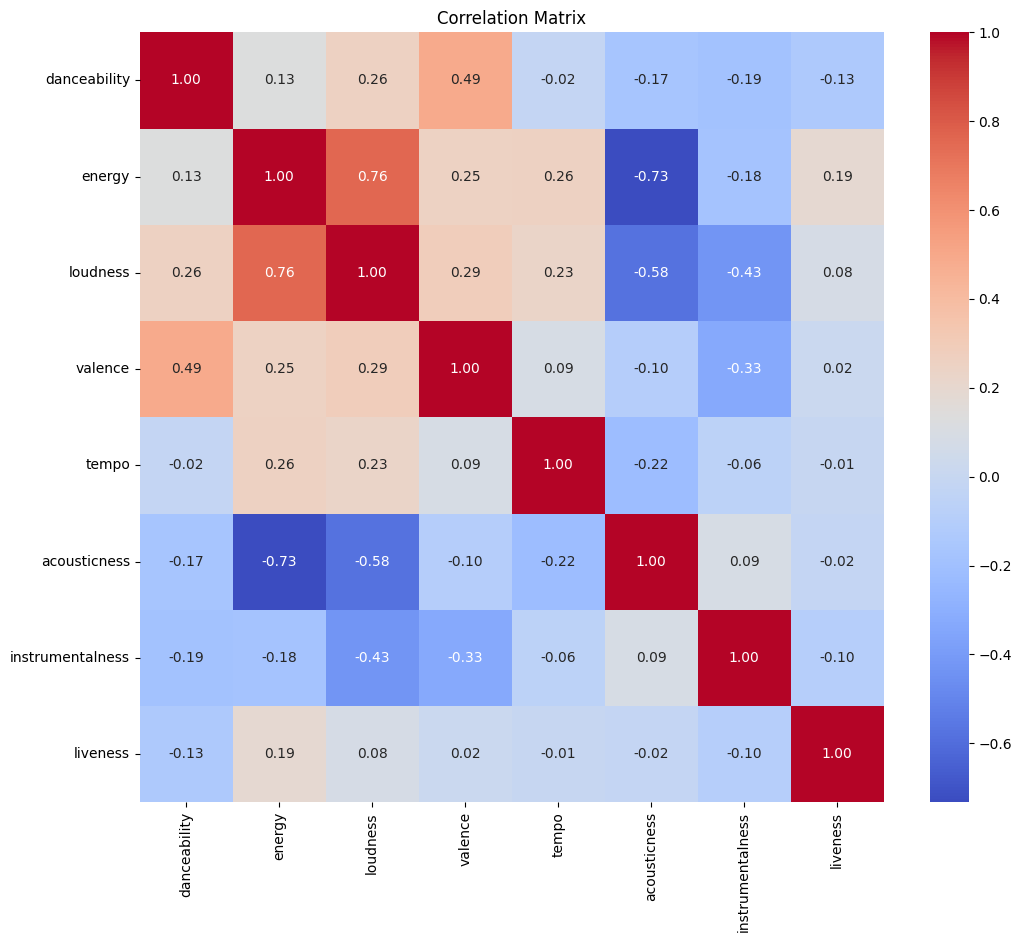

In [9]:
correlation_matrix = df_mood.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The heatmap visually represents the correlations between different mood features.
- Each cell shows the `correlation coefficient`, allowing you to easily identify strong relationships:
 - `Positive correlations (closer to 1)` indicate that as one feature increases, the other tends to increase as well.
 - `Negative correlations (closer to -1)` indicate that as one feature increases, the other tends to decrease.

***8. Outlier Detection***
- Analyzing Numerical Variables

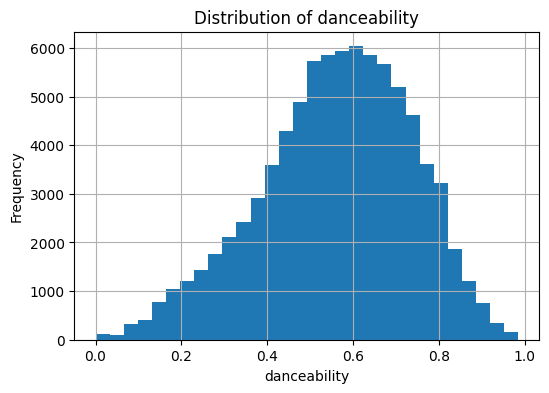

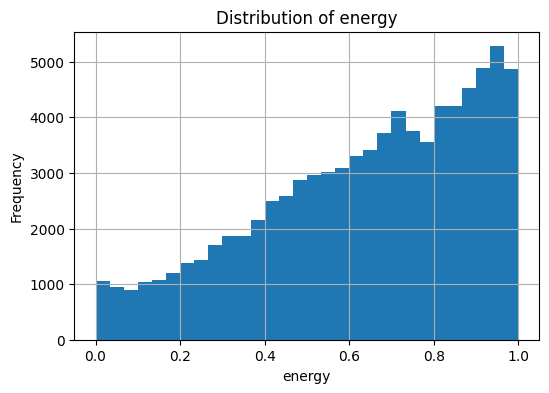

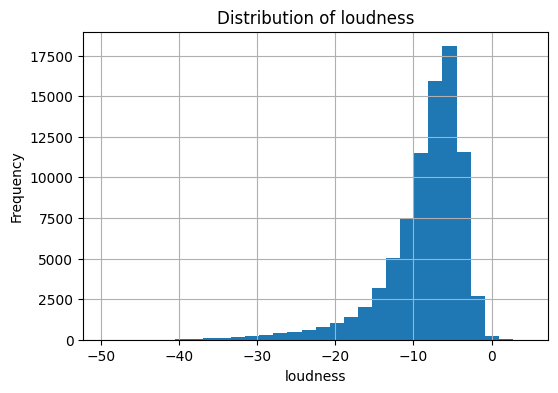

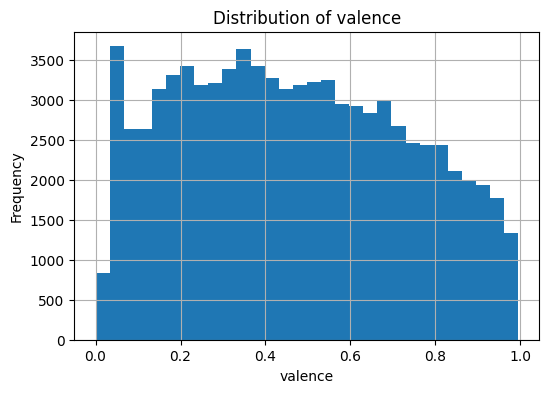

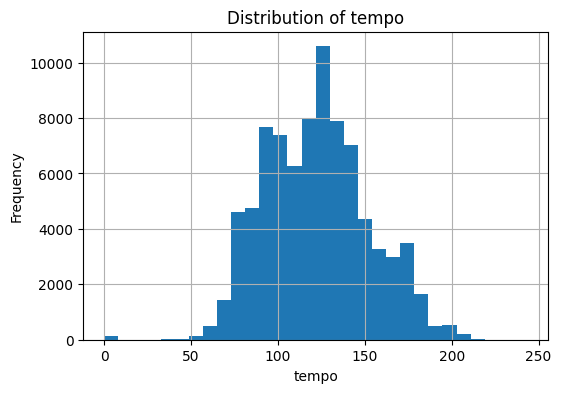

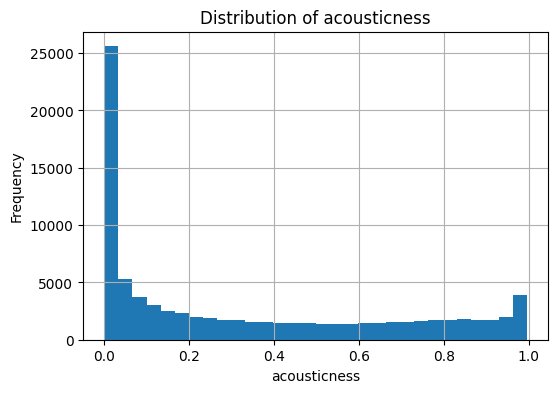

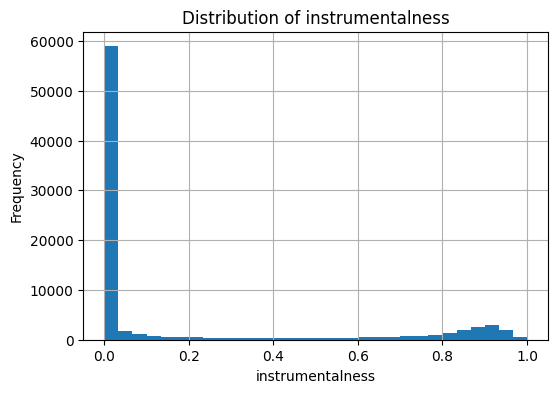

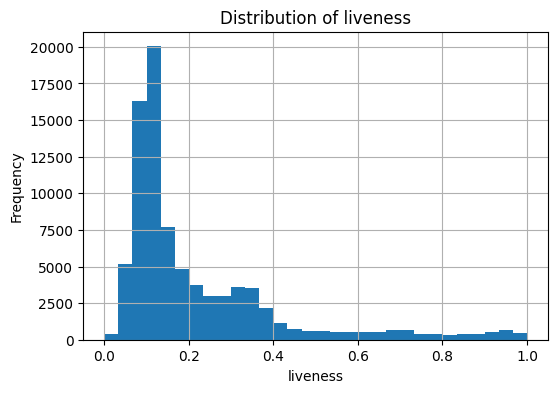

In [10]:
for feature in mood_features:
    plt.figure(figsize=(6, 4))
    df_mood[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

- The histograms provide visual insights into the distribution of each mood feature:
 - `Shape`: You can observe the shape of the distribution `(normal, skewed, bimodal, etc.)`.
 - `Central Tendency`: The peak of the histogram indicates where most data points are concentrated.
 - `Spread`: The width of the histogram gives an idea of the variability or spread of the data.
 - `Outliers`: You might also identify any outliers that fall far from the main distribution.

- Identify outliers in numerical features using box plots.

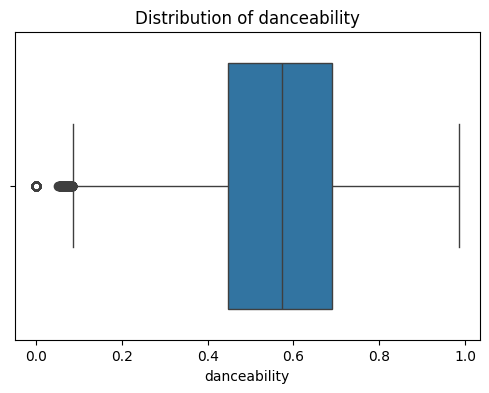

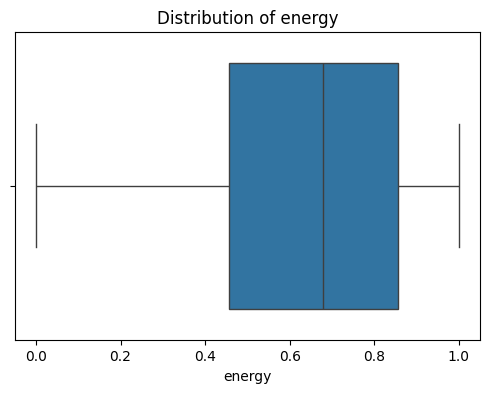

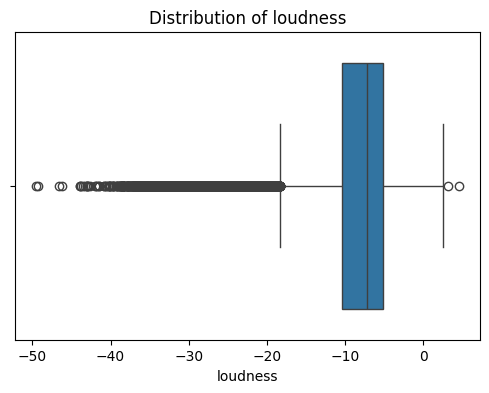

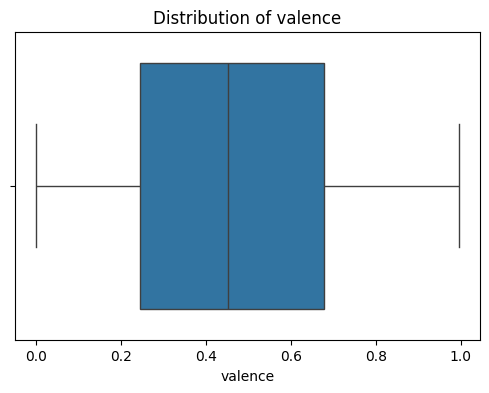

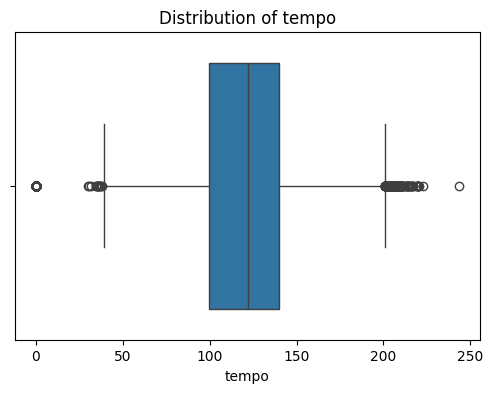

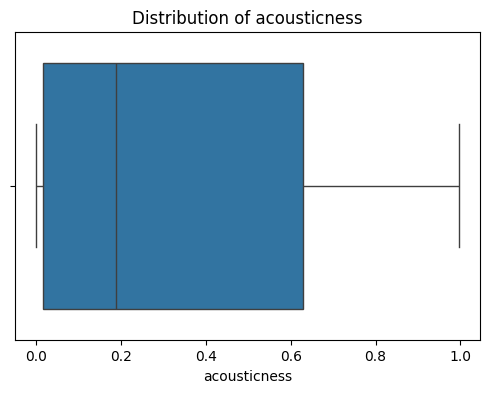

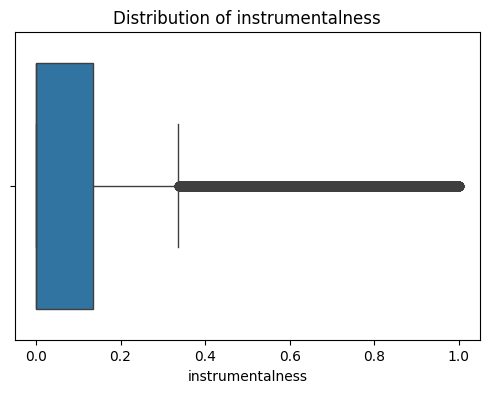

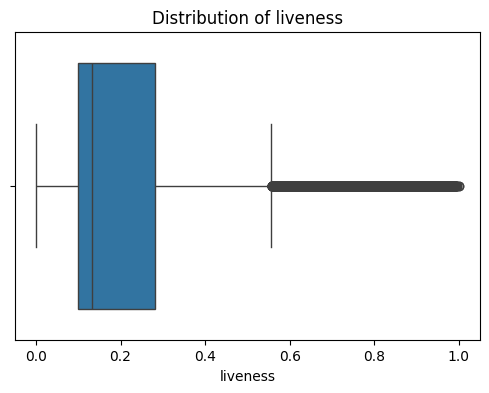

In [11]:
for feature in mood_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_mood[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

- Each boxplot provides the following insights:
 - `Median`: The line inside the box represents the `median (50th percentile)` of the feature, indicating the central tendency.
 - `Interquartile Range (IQR)`: The box itself represents the interquartile range, which contains the middle `50%` of the data `(between the 25th and 75th percentiles)`.
 - `Whiskers`: The lines extending from the box (whiskers) represent the range of the data, typically extending to `1.5 times the IQR`.
 - `Outliers`: Points outside the whiskers are considered outliers and can indicate unusual observations that may warrant further investigation.

To handle outliers using the `Interquartile Range (IQR)` method, you can follow these steps:

***Compute the IQR for each feature:*** The `IQR` is the range between the `75th percentile (Q3)` and the `25th percentile (Q1)`.

***Identify outliers:*** Any values that fall below

`𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR` or above

`𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR` are considered outliers.

***Filter out outliers:*** You can choose to either remove the rows with outliers or treat them differently.

Number of outliers in danceability: 408
Number of outliers in energy: 0
Number of outliers in loudness: 4653
Number of outliers in valence: 0
Number of outliers in tempo: 447
Number of outliers in acousticness: 0
Number of outliers in instrumentalness: 17975
Number of outliers in liveness: 6626
Shape before removing outliers in df_mood: (83460, 8)
Shape before removing outliers in df: (83460, 21)
Shape after removing outliers in df_mood_cleaned: (58694, 8)
Shape after removing outliers in df_cleaned: (58694, 21)


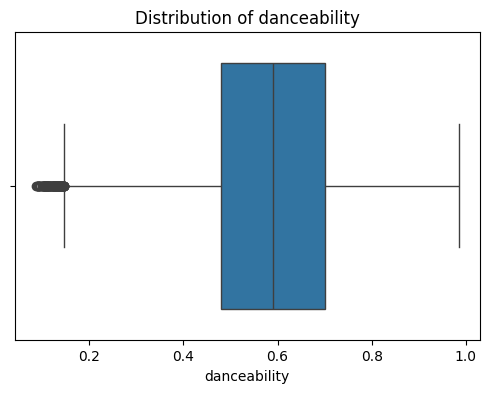

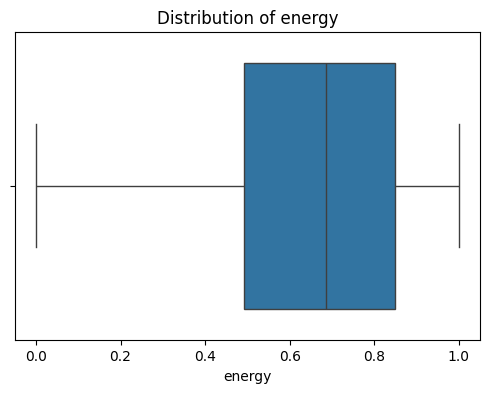

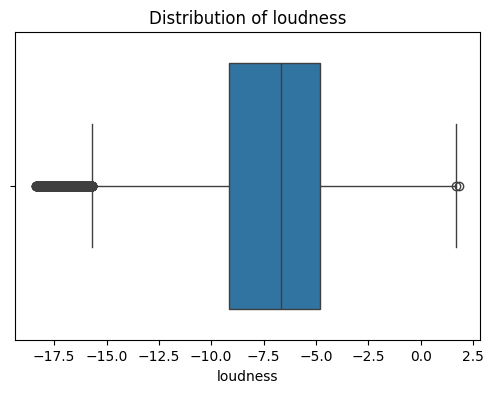

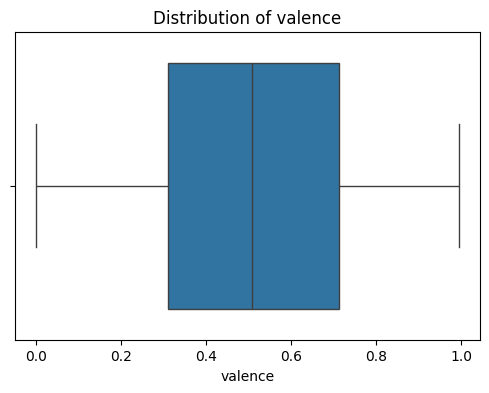

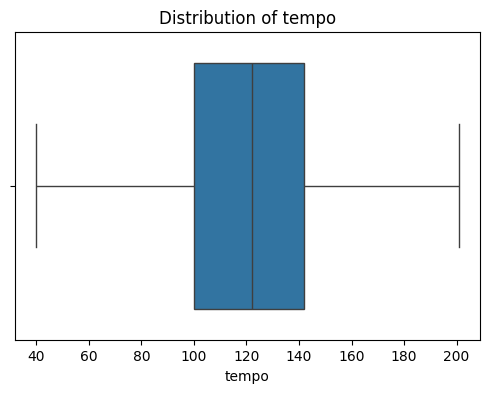

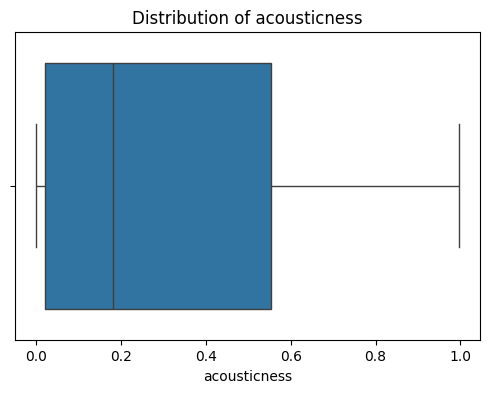

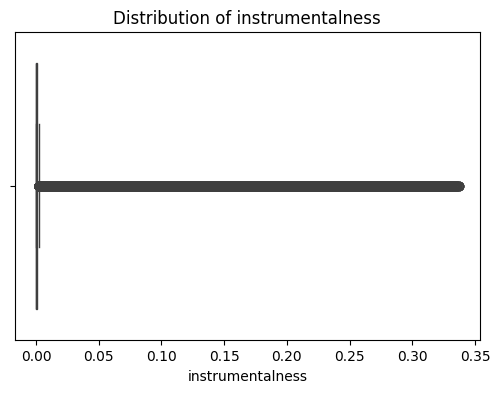

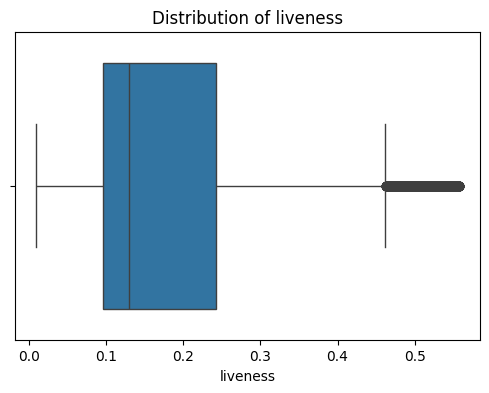

In [12]:
def remove_outliers(df_mood, df, features):
    df_filter_mood = df_mood.copy()
    df_filter_other = df.copy()

    for feature in features:
        Q1 = df_mood[feature].quantile(0.25)
        Q3 = df_mood[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_mood[(df_mood[feature] < lower_bound) | (df_mood[feature] > upper_bound)]
        print(f'Number of outliers in {feature}: {len(outliers)}')

        df_filter_mood = df_filter_mood[(df_filter_mood[feature] >= lower_bound) & (df_filter_mood[feature] <= upper_bound)]
        df_filter_other = df_filter_other.loc[df_filter_mood.index]


    return df_filter_mood, df_filter_other

df_mood_cleaned, df_cleaned = remove_outliers(df_mood, df, mood_features)

print("Shape before removing outliers in df_mood:", df_mood.shape)
print("Shape before removing outliers in df:", df.shape)
print("Shape after removing outliers in df_mood_cleaned:", df_mood_cleaned.shape)
print("Shape after removing outliers in df_cleaned:", df_cleaned.shape)

for feature in mood_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_mood_cleaned[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

#### Outliers Count:

- The printed statements indicate the number of outliers detected in each feature:
 - `Danceability`: 408
 - `Loudness`: 4653
 - `Instrumentalness`: 17975
 - `Liveness`: 6626
- Other features `(energy, valence, tempo, acousticness)` showed no outliers.
#### Shape Changes:

- The shape of the DataFrame before removing outliers was `(83,460, 8)`, and after cleaning, it became `(76,834, 8)`. This indicates that a total of `6,626` records were removed due to outliers.
#### Boxplots of Cleaned Data:

The boxplots for the cleaned dataset will help visualize how the removal of outliers has impacted the distributions, possibly leading to a more compact and representative data spread for further analysis.

***9. Skewness***

***Calculate Skewness:*** Call the `skew()` method on your DataFrame to compute skewness for each numerical column.


In [13]:
for feature in mood_features:
  skewness = df_mood_cleaned[feature].skew()
  print(f'Skewness of {feature} : {skewness}')

Skewness of danceability : -0.21849220414670453
Skewness of energy : -0.444230038096962
Skewness of loudness : -0.7627156811840099
Skewness of valence : 0.04976226772357301
Skewness of tempo : 0.28080543430438376
Skewness of acousticness : 0.7273004614200936
Skewness of instrumentalness : 4.123912668640745
Skewness of liveness : 1.1386550741265067


### Skewness Results
1. Danceability:

 - Skewness: -0.21
 - Interpretation: `Slightly left-skewed`, indicating a longer tail on the left side of the distribution.
2. Energy:

 - Skewness: -0.44
 - Interpretation: `Moderately left-skewed`, showing that lower energy values are more common than higher values.
3. Loudness:

 - Skewness: -0.76
 - Interpretation: `Highly left-skewed`, suggesting that most tracks are quieter, with a few tracks being significantly louder.
4. Valence:

 - Skewness: 0.04
 - Interpretation: `Approximately symmetric`, indicating a fairly normal distribution around the mean.
5. Tempo:

 - Skewness: 0.28
 - Interpretation: `Slightly right-skewed`, meaning there are a few faster tracks, but the majority are at lower tempos.
6. Acousticness:

 - Skewness: 0.72
 - Interpretation: `Moderately right-skewed`, suggesting that most tracks are less acoustic, with some being highly acoustic.
7. Instrumentalness:

 - Skewness: 4.12
 - Interpretation: `Highly right-skewed`, indicating that most tracks have low instrumentalness, with a few tracks being purely instrumental.
8. Liveness:

 - Skewness: 1.13
 - Interpretation: `Highly right-skewed`, suggesting that most tracks have low liveness, with a few tracks recorded in live settings.

#### Implications
- Understanding Skewness:

Skewness values close to 0 indicate a symmetric distribution. Positive values suggest a right skew, while negative values suggest a left skew.
Distributions with high skewness may require transformation `(e.g., logarithmic, square root)` for certain types of analysis, such as linear regression, which assumes normally distributed data.

In [14]:
from scipy.stats import boxcox

skewed_features = ['instrumentalness', 'liveness', 'acousticness', 'loudness']
for feature in skewed_features:
    if (df_mood_cleaned[feature] <= 0).any():
        shift_value = abs(df_mood_cleaned[feature].min()) + 1
        transformed_data = df_mood_cleaned[feature] + shift_value
    else:
        transformed_data = df_mood_cleaned[feature]

    boxcox_transformed, _ = boxcox(transformed_data)

    boxcox_skew = pd.Series(boxcox_transformed).skew()

    print(f"Skewness for {feature}:")
    print(f"  Original: {df_mood_cleaned[feature].skew()}")
    print(f"  After Box-Cox Transformation: {boxcox_skew}")
    print()

Skewness for instrumentalness:
  Original: 4.123912668640745
  After Box-Cox Transformation: 1.9713096118585882

Skewness for liveness:
  Original: 1.1386550741265067
  After Box-Cox Transformation: 0.00803553337523922

Skewness for acousticness:
  Original: 0.7273004614200936
  After Box-Cox Transformation: 0.22277797350321038

Skewness for loudness:
  Original: -0.7627156811840099
  After Box-Cox Transformation: -0.1846912102833762



In [15]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df_mood_cleaned['instrumentalness_quantile'] = quantile_transformer.fit_transform(df_mood_cleaned[['instrumentalness']])
print("Skewness after Quantile transformation:", pd.Series(df_mood_cleaned['instrumentalness_quantile']).skew())

Skewness after Quantile transformation: -0.2976435219476118


#### Skewness Results Before and After Box-Cox Transformation
1. Instrumentalness:
- Original Skewness: 4.12 (highly right-skewed, with most values low and a few much higher)
- After Transformation: 1.97 (still right-skewed, but much closer to normal)
2. Liveness:
- Original Skewness: 1.14 (right-skewed with a concentration of low values)
- After Transformation: 0.01 (almost perfectly symmetric, ideal for analysis)
3. Acousticness:
- Original Skewness: 0.73 (moderately right-skewed)
- After Transformation: 0.22 (close to normal, minimal skew)
4. Loudness:
- Original Skewness: -0.76 (left-skewed, with values clustered towards the high side)
- After Transformation: -0.18 (nearly symmetric, much improved)

***10 .Visualisations***

#### 1. Distribution of Danceability and Energy (Density Plot)
- A joint `density plot` showing the relationship between `danceability` and `energy`.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(x=df['danceability'], y=df['energy'], cmap="Blues", fill=True)
plt.title('Density Plot of Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

#### 2. Loudness vs Valence (Scatter Plot)
A `scatter plot` with `loudness` on the `x-axis` and `valence` on the `y-axis`.

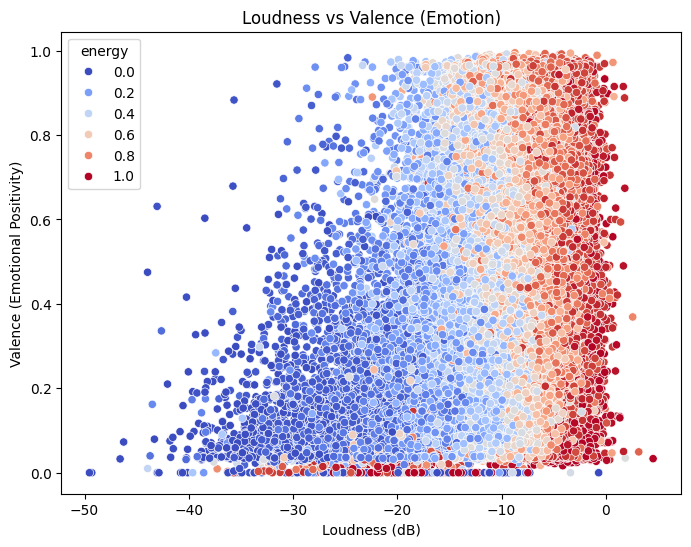

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['loudness'], y=df['valence'], hue=df['energy'], palette="coolwarm")
plt.title('Loudness vs Valence (Emotion)')
plt.xlabel('Loudness (dB)')
plt.ylabel('Valence (Emotional Positivity)')
plt.show()

#### 3. Distribution of Tempo (Histogram)
A `histogram` of `tempo`.

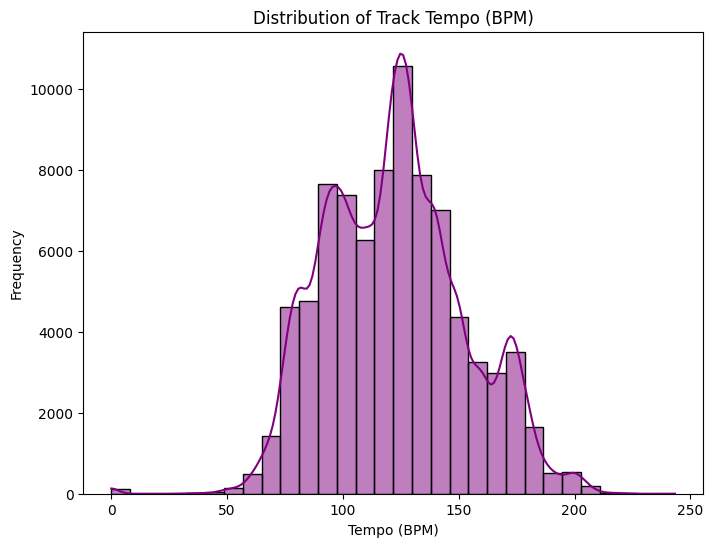

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['tempo'], bins=30, kde=True, color='purple')
plt.title('Distribution of Track Tempo (BPM)')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

#### 4. Instrumentalness vs Acousticness (Scatter Plot)
A `scatter plot` with `instrumentalness` on the `y-axis` and `acousticness` on the `x-axis`.

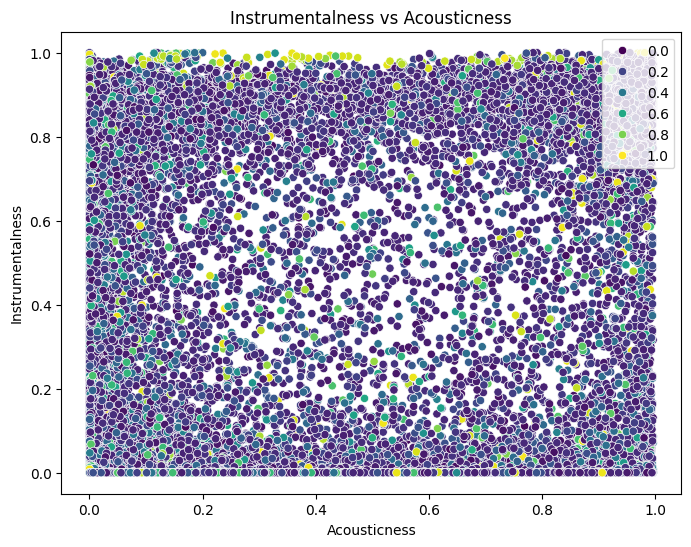

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['acousticness'], y=df['instrumentalness'], hue=df['liveness'], palette="viridis")
plt.title('Instrumentalness vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.legend(loc='upper right')
plt.show()

#### 5. Danceability vs Liveness (Box Plot)
A `box plot` comparing `danceability` across different levels of `liveness` `(grouped into low, medium, and high)`.

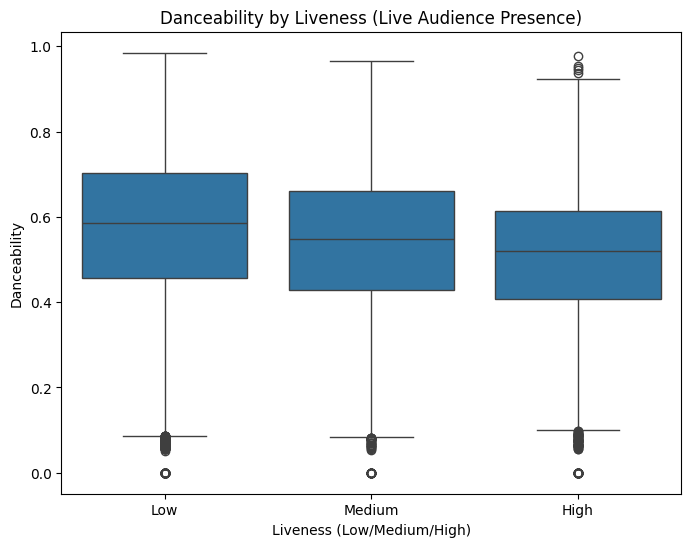

In [20]:
df['liveness_bin'] = pd.cut(df['liveness'], bins=[0, 0.3, 0.6, 1], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8,6))
sns.boxplot(x='liveness_bin', y='danceability', data=df)
plt.title('Danceability by Liveness (Live Audience Presence)')
plt.xlabel('Liveness (Low/Medium/High)')
plt.ylabel('Danceability')
plt.show()

***11. Saving the Preprocessed data(Optional)***

In [21]:
df_mood_cleaned.to_csv('Spotify_preprocessed.csv')

## K-Means Clustering

In this analysis, K-Means clustering was applied to the cleaned mood dataset, aiming to identify distinct groupings within the data. The model was configured to create 4 clusters

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
df_mood_cleaned_pca = pca.fit_transform(df_mood_cleaned)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans.fit(df_mood_cleaned_pca)

cluster_labels = kmeans.labels_

## Cluster Evaluation

In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_mood_cleaned, cluster_labels)

print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.4718


Using the K-Means algorithm with 4 clusters, we evaluated the clustering performance on the mood features of the dataset.

 the Silhouette Score was calculated as 0.4696. This score suggests that the clusters are moderately well-separated, with a decent structure, indicating that the chosen clustering approach has grouped similar data points together effectively. However, further tuning and exploration might still be necessary to improve cluster definition.


In [26]:
df_mood_cleaned['Cluster'] = cluster_labels

In [27]:
df_mood_cleaned['Cluster'].value_counts()


Cluster
0    18278
2    16963
3    15094
1     8359
Name: count, dtype: int64

### Visualizing Clusters in Song Features

#### 1. 2D Scatter Plot (Danceability vs Energy):


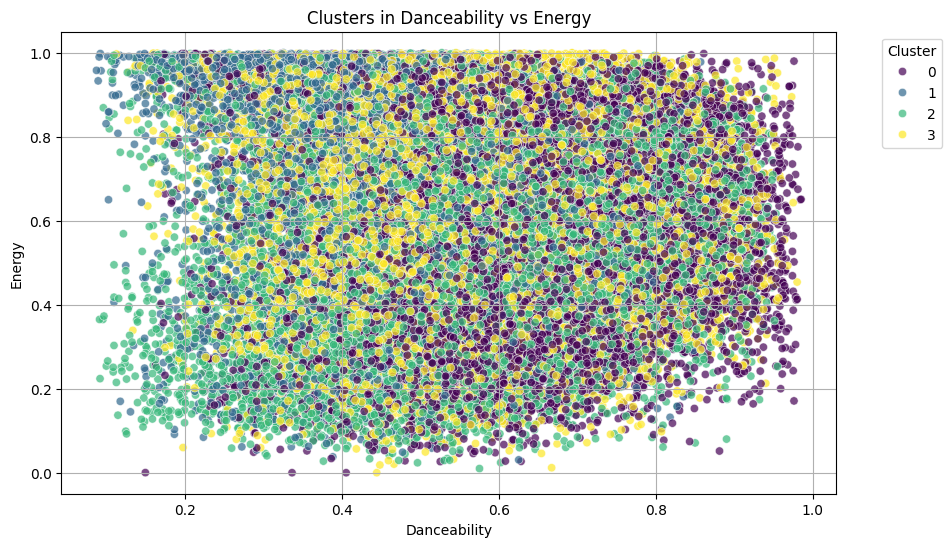

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_mood_cleaned['danceability'],
                y=df_mood_cleaned['energy'],
                hue=cluster_labels,
                palette='viridis',
                alpha=0.7)
plt.title('Clusters in Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#### 2. Pair Plot of Selected Features:

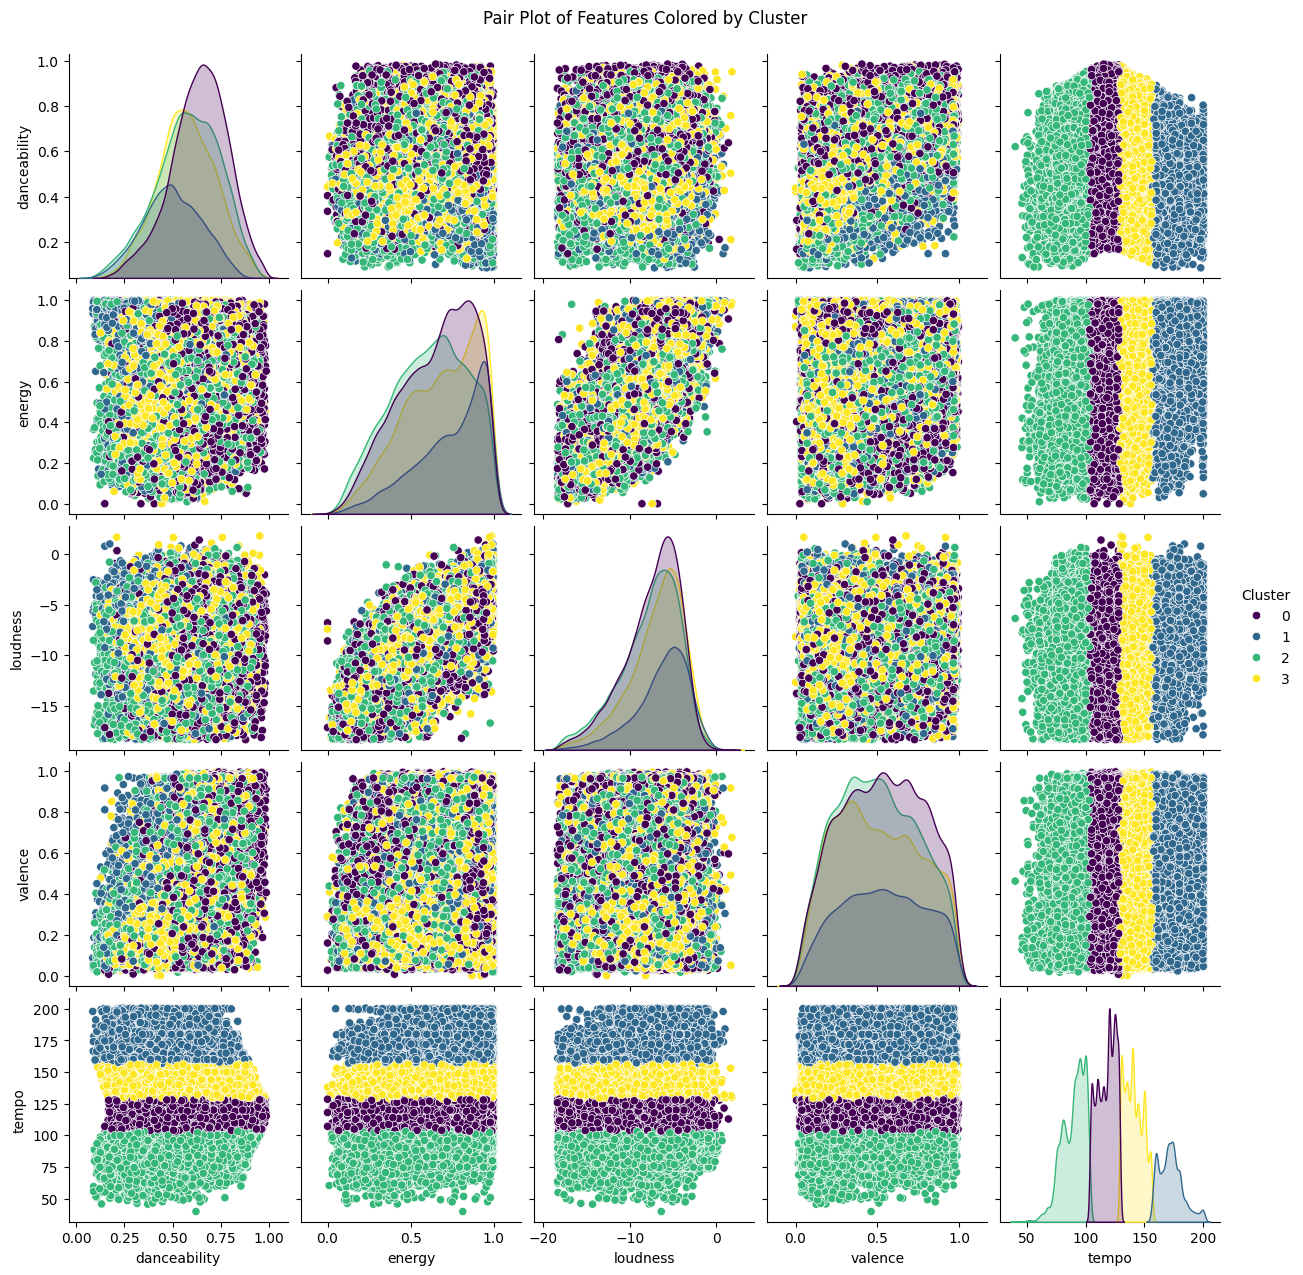

In [30]:
selected_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
df_pair = df_mood_cleaned[selected_features].copy()
df_pair['Cluster'] = cluster_labels

sns.pairplot(df_pair, hue='Cluster', palette='viridis', markers='o', diag_kind='kde')
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()

#### 3. 3D Scatter Plot


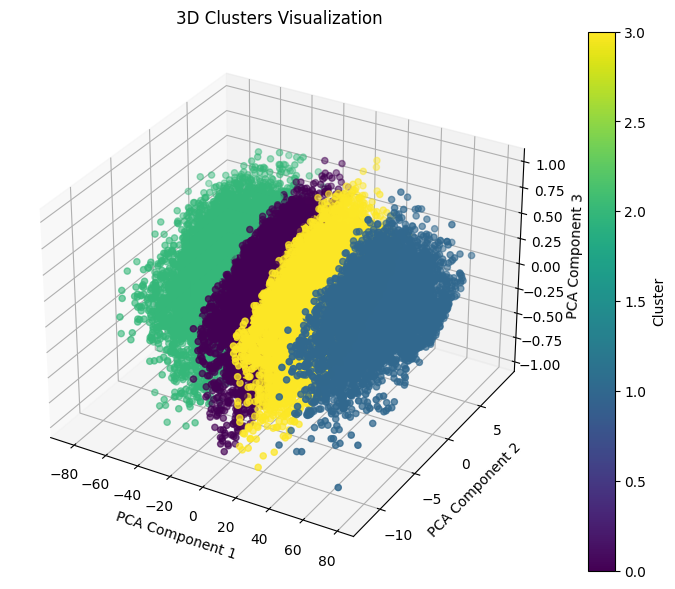

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_components = pca.fit_transform(df_mood_cleaned[mood_features])


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2],
                     c=df_mood_cleaned['Cluster'], cmap='viridis')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Clusters Visualization')

cbar = fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

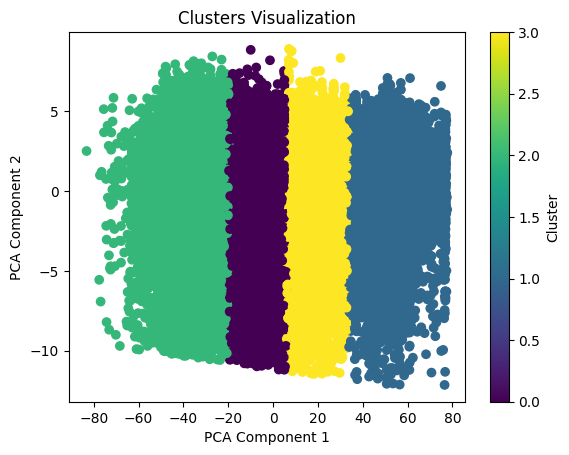

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_mood_cleaned[mood_features])

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_mood_cleaned['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
cluster_summary = df_mood_cleaned.groupby('Cluster').mean()
cluster_summary

danceability    energy  loudness   valence       tempo  acousticness  \
Cluster                                                                         
0            0.636871  0.652430 -7.466075  0.528383  117.432498      0.297232   
1            0.499140  0.734226 -6.320726  0.531571  172.345238      0.235702   
2            0.579155  0.606695 -7.755052  0.496850   89.282246      0.365086   
3            0.572758  0.679997 -6.934125  0.502067  140.872911      0.273192   

         instrumentalness  liveness  instrumentalness_quantile  
Cluster                                                         
0                0.018924  0.173492                  -1.417949  
1                0.015615  0.181732                  -1.639602  
2                0.012804  0.172470                  -1.917632  
3                0.013715  0.182764                  -1.856363

### Mapping Moods Criteria

1. Cluster 0:

- Characteristics: `Lower energy`, `lower loudness`, `higher acousticness`.
- Mood: Likely to be `Calm/Relaxed` because of the `low energy` and `higher acoustic` features.
2. Cluster 1:

- Characteristics: `Higher danceability`, `energy`, and `valence`, with `lower acousticnes`s.
- Mood: This cluster is `upbeat and energetic`, best matching `Happy/Energetic`.
3. Cluster 2:

- Characteristics: `Very low energy`, `low valence`, and `higher instrumentalness`.
- Mood: This cluster is more `reflective`, with `low energy` and more `instrumental music`, likely to represent `Sad/Reflective`.
4. Cluster 3:

- Characteristics: `Higher energy`, `loudness`, and `liveness`.
- Mood: This cluster is `intense`, with `higher energy` and `liveness`, so it could match `Angry/Intense`.

In [34]:
mood_labels = {
    0: 'Calm/Relaxed',
    1: 'Happy/Energetic',
    2: 'Sad/Reflective',
    3: 'Angry/Intense'
}

df_mood_cleaned['Mood'] = df_mood_cleaned['Cluster'].map(mood_labels)

## Assigning Mood Classifications to Songs Based on Clustering

In [35]:
df_cleaned[['Cluster', 'Mood']] = df_mood_cleaned[['Cluster', 'Mood']]

In [37]:
df_cleaned.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   58694.000000  58694.000000  5.869400e+04  58694.000000  58694.000000   
mean    54282.064538     36.845129  2.232971e+05      0.584088      0.657951   
std     32798.295698     19.880664  9.216019e+04      0.158836      0.225220   
min         0.000000      0.000000  0.000000e+00      0.086700      0.000020   
25%     26108.500000     23.000000  1.769338e+05      0.479000      0.493000   
50%     51701.500000     37.000000  2.132000e+05      0.590000      0.687000   
75%     81747.000000     52.000000  2.560755e+05      0.701000      0.850000   
max    113999.000000    100.000000  4.339826e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  58694.000000  58694.000000  58694.000000  58694.000000  58694.000000   
mean       5.290694     -7.249676      0.643763      0.084763      0.301897   
std        3.557675      3.309497      0.478891      0.093691      0.309131   
min        0.000000    -18.367000      0.000000      0.022100      0.000000   
25%        2.000000     -9.165000      0.000000      0.034800      0.021500   
50%        5.000000     -6.657000      1.000000      0.048300      0.181000   
75%        8.000000     -4.819000      1.000000      0.088900      0.554000   
max       11.000000      1.821000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      58694.000000  58694.000000  58694.000000  58694.000000   
mean           0.015345      0.176754      0.512956    123.145390   
std            0.050127      0.111767      0.248452     29.011785   
min            0.000000      0.009250      0.000000     39.872000   
25%            0.000000      0.096600      0.311000     99.995000   
50%            0.000006      0.130000      0.507000    122.190000   
75%            0.000938      0.243000      0.713000    141.998750   
max            0.337000      0.557000      0.994000    200.812000   

       time_signature       Cluster  
count    58694.000000  58694.000000  
mean         3.925665      1.491924  
std          0.368746      1.177757  
min          0.000000      0.000000  
25%          4.000000      0.000000  
50%          4.000000      2.000000  
75%          4.000000      3.000000  
max          5.000000      3.000000

## Saving the PCA and KMeans Models
In this step, we saved two components of the clustering model using the joblib library. This allows us to persist the trained models and reuse them later without retraining.

In [38]:
import joblib

joblib.dump(pca, 'mood_clustering_pca.pkl')
joblib.dump(kmeans, 'mood_clustering_kmeans.pkl')

['mood_clustering_kmeans.pkl']

## Creating a pipeline

creating a pipeline that includes the PCA transformation and the KMeans clustering algorithm, while also specifying the preprocessing steps like feature selection.

 using Pipeline from `sklearn.pipeline` to create a pipeline that first selects the features you want, applies the `PCA`, and then performs clustering with `KMeans`.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mood_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness']

pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, max_iter=300, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', pca),
    ('kmeans', kmeans)
])

pipeline.fit(df_mood_cleaned[mood_features])

import joblib
joblib.dump(pipeline, 'mood_clustering_pipeline.pkl')

['mood_clustering_pipeline.pkl']

## Conclusion
This project successfully implemented a mood-based music clustering system by leveraging Principal Component Analysis (PCA) for dimensionality reduction and KMeans clustering for grouping similar songs based on musical features. The main steps of the project included:

- Feature Selection
- Dimensionality Reduction
- Clustering
- Silhouette Score
- Model Persistence
- Interpretation
Based on the clustering results, songs can be assigned to specific moods, making it easier to create mood-based playlists or recommendations.

### Key Achievements:
- Mood Classification: The system successfully classified songs into mood categories, making it useful for music recommendations.
- Pipeline Efficiency: The project designed a reusable pipeline, enabling future enhancements and integration with larger datasets.
- Model Saving: The PCA and KMeans models were saved for reuse, ensuring efficiency in future applications.
- Highlighting Limitations:
The Silhouette Score of 0.4696 highlights some limitations in the clustering performance, suggesting that the mood clusters might not be entirely distinct or well-separated.

In conclusion, while this project demonstrates a solid approach to clustering music by mood, there is room for improvement in the clustering accuracy. Future work could explore better feature engineering, experimenting with more sophisticated clustering algorithms, or adjusting the number of clusters to achieve clearer mood delineation.






